<a href="https://colab.research.google.com/github/efthymios19/Phydrus_GoogleColab/blob/main/Examples/Hydrus_example_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### HYDRUS example

In [15]:
!rm -rf /content/Phydrus_GoogleColab
# Clone the repository
!git clone https://github.com/efthymios19/Phydrus_GoogleColab.git

# Make the mf6 file executable
!chmod +x /content/Phydrus_GoogleColab/bin/hydrus

# To avoid some Google Colab unconvenients
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)



Cloning into 'Phydrus_GoogleColab'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 26 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (26/26), 284.04 KiB | 1.64 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [16]:
!pip install phydrus

In [17]:
import os
import phydrus as ps
%matplotlib inline

In [18]:
# Folder for Hydrus files to be stored
ws = '/content/Phydrus_GoogleColab/modelFiles' #use particular names
exe = '/content/Phydrus_GoogleColab/bin/hydrus'
# Description
desc = "Infiltration of Water into a Single-Layered Soil Profile"
# Create model
ml = ps.Model(exe_name=exe, ws_name=ws, name="model", description=desc, mass_units="mmol",
              time_unit="days", length_unit="cm")
ml.basic_info["lFlux"] = True
ml.basic_info["lShort"] = False

ml.add_time_info(tmax=1, print_times=True, nsteps=12, dt=0.001)



INFO: Directory /content/Phydrus_GoogleColab/modelFiles created
INFO:phydrus.model:Directory /content/Phydrus_GoogleColab/modelFiles created


array([0.08333333, 0.16666667, 0.25      , 0.33333333, 0.41666667,
       0.5       , 0.58333333, 0.66666667, 0.75      , 0.83333333,
       0.91666667, 1.        ])

In [19]:
ml.add_waterflow(top_bc=0, bot_bc=4)

m = ml.get_empty_material_df(n=1)
m.loc[[1]] = [[0.078, 0.43, 0.036, 1.56, 24.96, 0.5]]
ml.add_material(m)



In [20]:
elements = 100  # Disctretize soil column into n elements
depth = -100  # Depth of the soil column
ihead = -100  # Determine initial Pressure Head
# Create Profile
profile = ps.create_profile(bot=depth, dx=abs(depth / elements), h=ihead)
profile.iloc[0, 1] = 1  # Define initial Pressure Head at the surface
ml.add_profile(profile)  # Add the profile

In [21]:
# Add observation nodes at depth
ml.add_obs_nodes([-20, -40, -60, -80, -100])



In [22]:
ml.write_input()
ml.simulate()



INFO: Successfully wrote /content/Phydrus_GoogleColab/modelFiles/SELECTOR.IN
INFO:phydrus.model:Successfully wrote /content/Phydrus_GoogleColab/modelFiles/SELECTOR.IN
INFO: Successfully wrote /content/Phydrus_GoogleColab/modelFiles/PROFILE.DAT
INFO:phydrus.model:Successfully wrote /content/Phydrus_GoogleColab/modelFiles/PROFILE.DAT
INFO: Hydrus-1D Simulation Successful.
INFO:phydrus.model:Hydrus-1D Simulation Successful.


CompletedProcess(args=['/content/Phydrus_GoogleColab/bin/hydrus', '/content/Phydrus_GoogleColab/modelFiles', '-1'], returncode=0)

/usr/local/lib/python3.11/dist-packages/phydrus/read.py:259: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df1 = read_csv(path, skiprows=start, index_col=0, nrows=end - start - 1,


<Axes: xlabel='Time [days]', ylabel='h'>

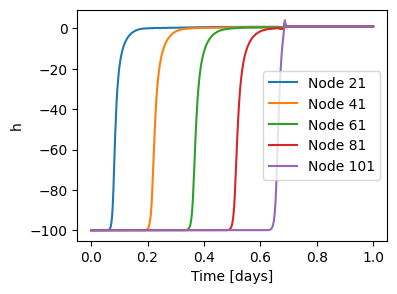

In [23]:
ml.plots.obs_points()



/usr/local/lib/python3.11/dist-packages/phydrus/plot.py:148: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=(1, 1), loc="upper left")


<Axes: xlabel='h [cm]', ylabel='Depth [cm]'>

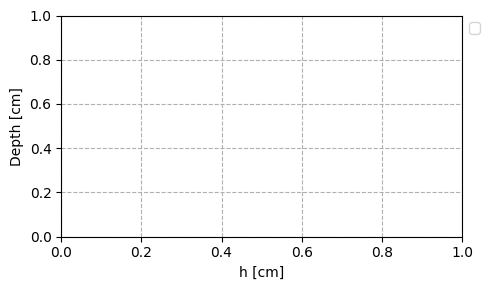

In [24]:
ml.plots.profile_information()

<Axes: xlabel='Theta [-]', ylabel='Depth [cm]'>

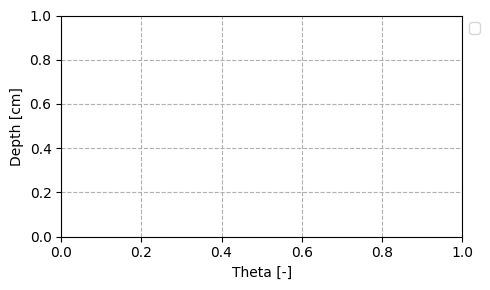

In [25]:
ml.plots.profile_information("Water Content")



In [26]:
ml.plots.water_flow(data="Actual Surface Flux")



UnboundLocalError: cannot access local variable 's' where it is not associated with a value

/usr/local/lib/python3.11/dist-packages/phydrus/read.py:99: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data[i] = read_csv(file, skiprows=start + 1, nrows=nrows,


array([<Axes: xlabel='h', ylabel='theta'>, <Axes: xlabel='log_h'>],
      dtype=object)

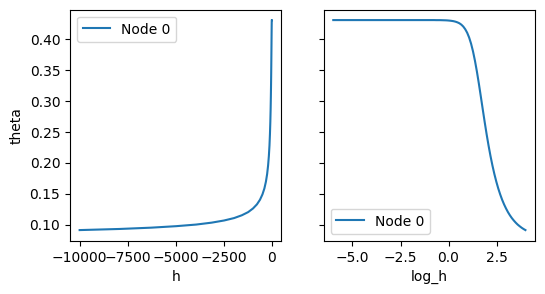

In [30]:
ml.plots.soil_properties()



/usr/local/lib/python3.11/dist-packages/phydrus/read.py:99: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data[i] = read_csv(file, skiprows=start + 1, nrows=nrows,


array([<Axes: xlabel='h', ylabel='K'>, <Axes: xlabel='log_h'>],
      dtype=object)

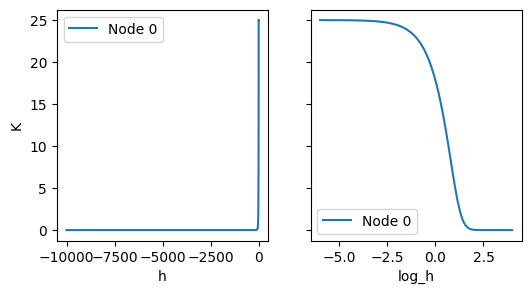

In [33]:
ml.plots.soil_properties(data='Hydraulic Conductivity')